In [16]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [17]:
#loading the datasets
df1 = pd.read_csv('datatest.csv')
df2 = pd.read_csv('datatraining.csv')

df = pd.concat([df1, df2])
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/2/2015 14:19,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2/2/2015 14:19,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2/2/2015 14:21,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2/2/2015 14:22,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2/2/2015 14:23,23.7540,26.200,488.600000,779.000000,0.004767,1


## Some Numerical Information about the Data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10808 entries, 0 to 8142
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           10808 non-null  object 
 1   Temperature    10808 non-null  float64
 2   Humidity       10808 non-null  float64
 3   Light          10808 non-null  float64
 4   CO2            10808 non-null  float64
 5   HumidityRatio  10808 non-null  float64
 6   Occupancy      10808 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 675.5+ KB


In [12]:
df.nunique()

date             8645
Temperature       437
Humidity         1749
Light            1195
CO2              3516
HumidityRatio    5044
Occupancy           2
dtype: int64

## Data Cleaning

In [18]:
#removing the duplicate values
df.drop_duplicates(inplace=True)

In [19]:
# Split time column values into date and time 
df['time'] = df['date'].apply(lambda x : x.split()[1])
df['date'] = df['date'].apply(lambda x : x.split()[0])

In [20]:
# Split time column and only save Hour values
df['time'] = df['time'].apply(lambda x : x.split(':')[0])
# Split date column and only save day values
df['date'] = df['date'].apply(lambda x : x.split('/')[1])

## Data Visualization

In [22]:
# Define list of Continuous columns Names
continuous = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'date', 'time']

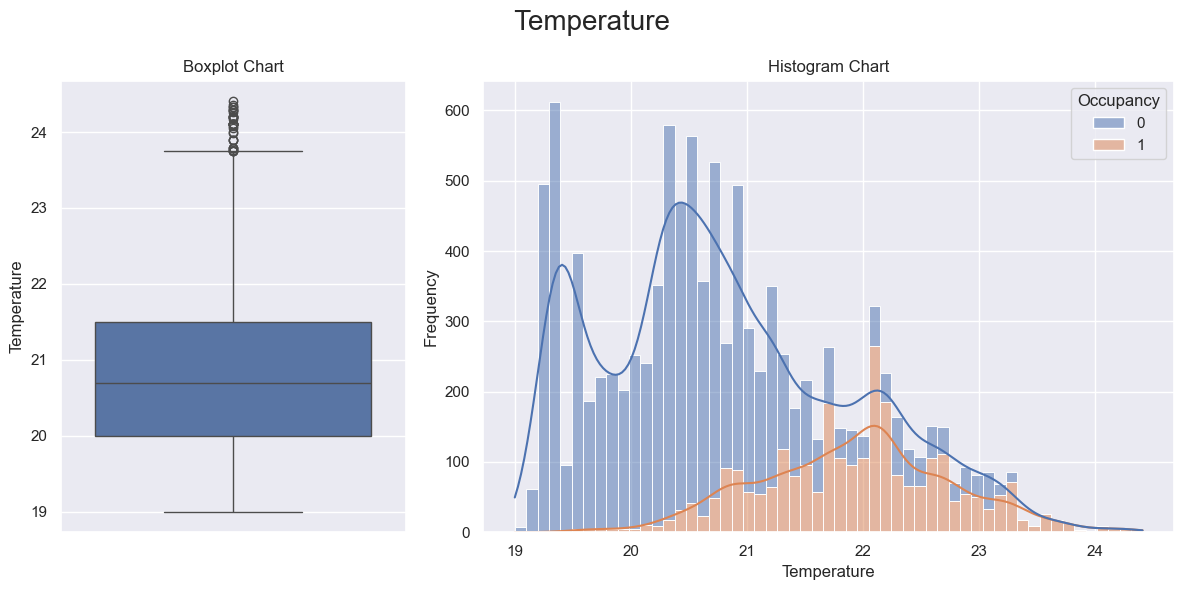

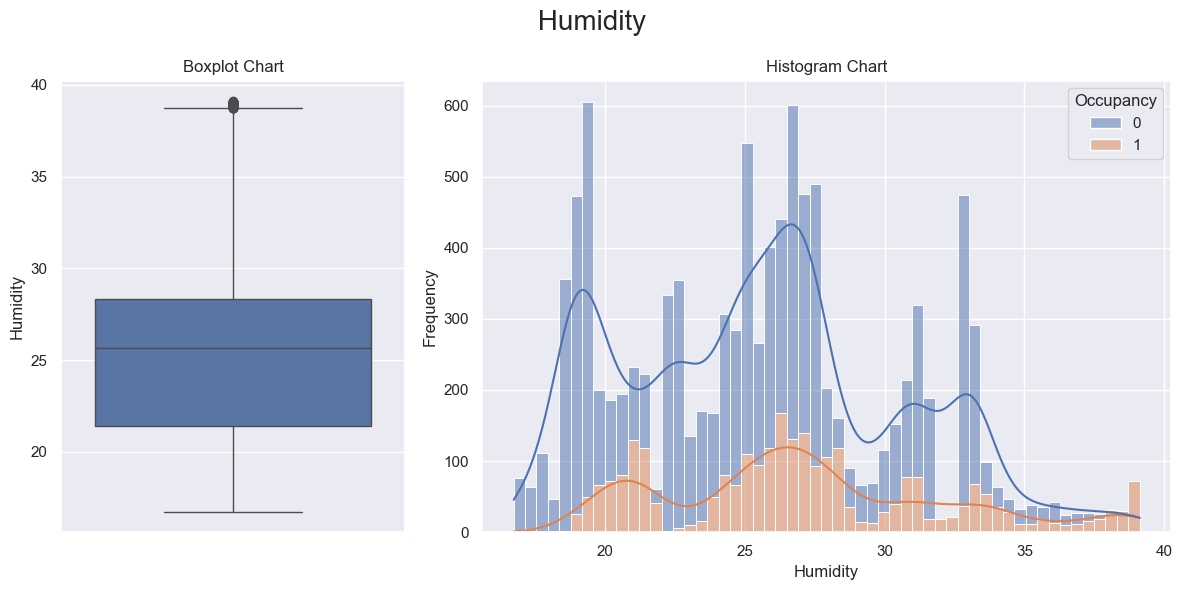

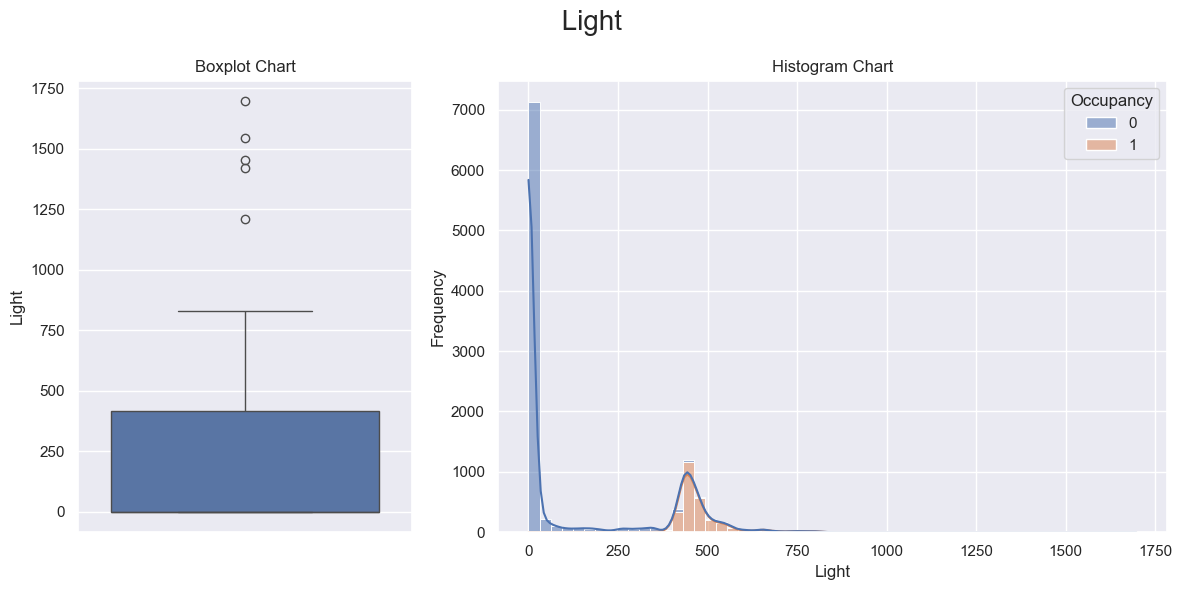

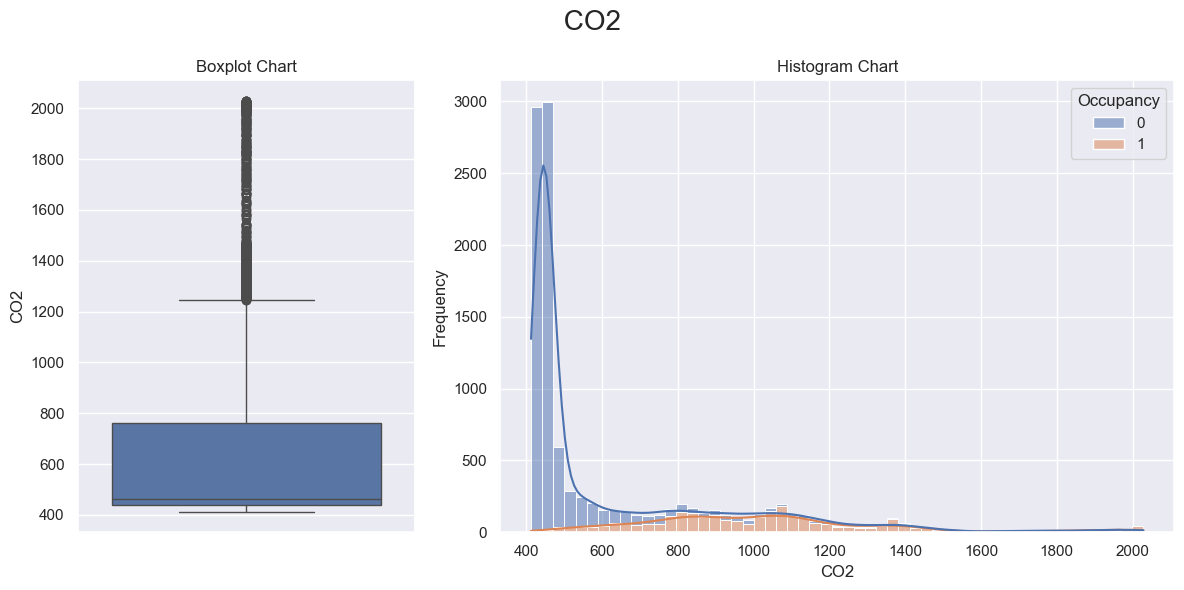

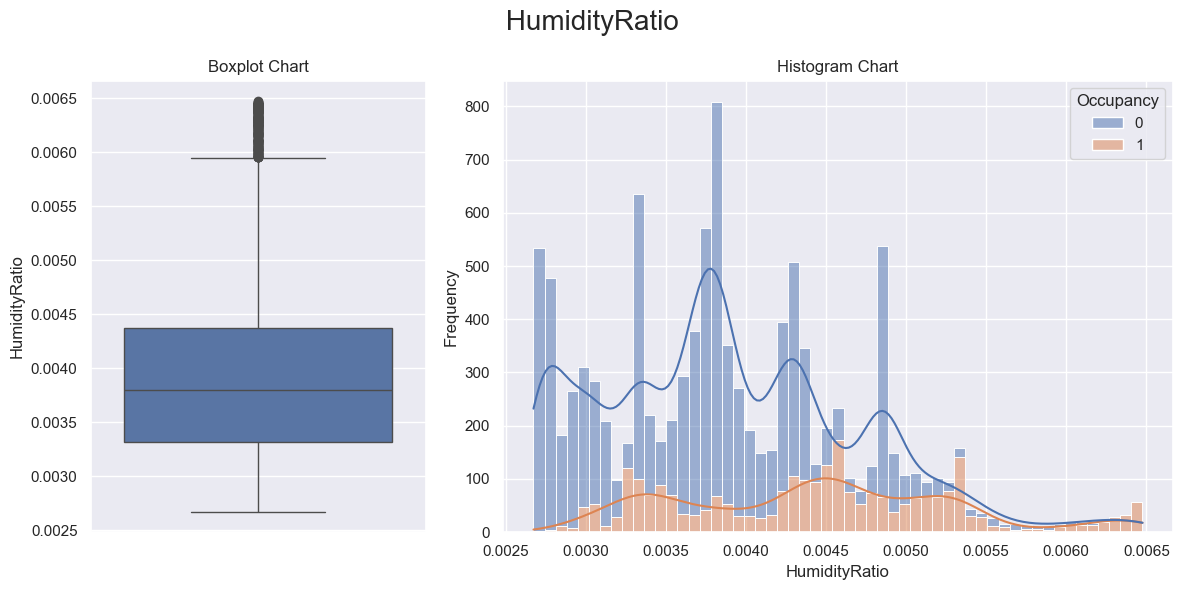

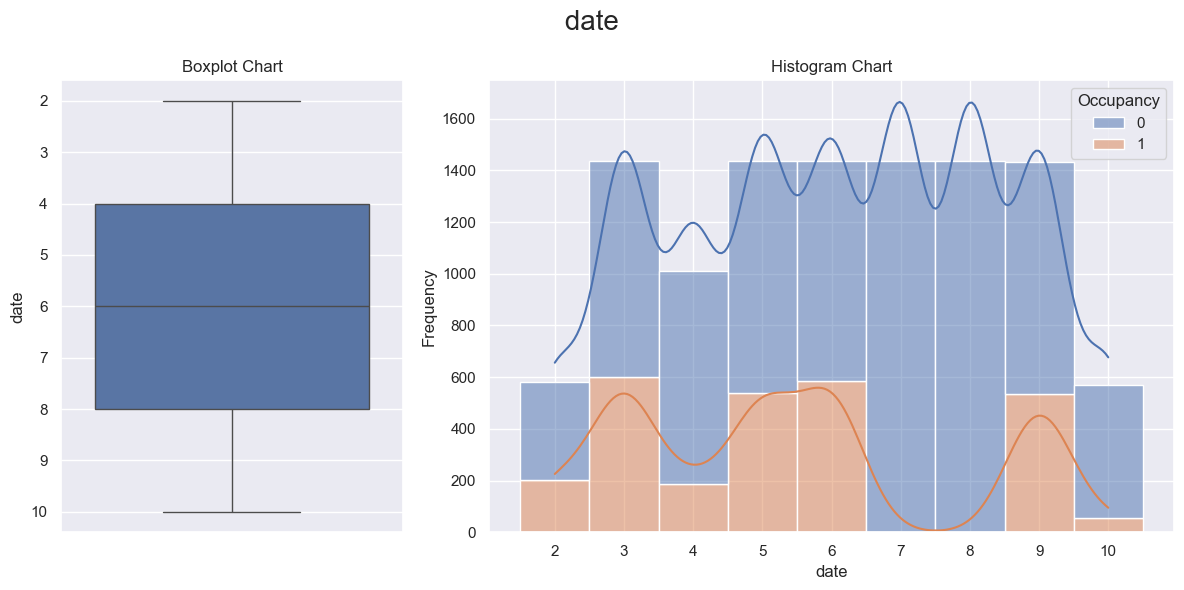

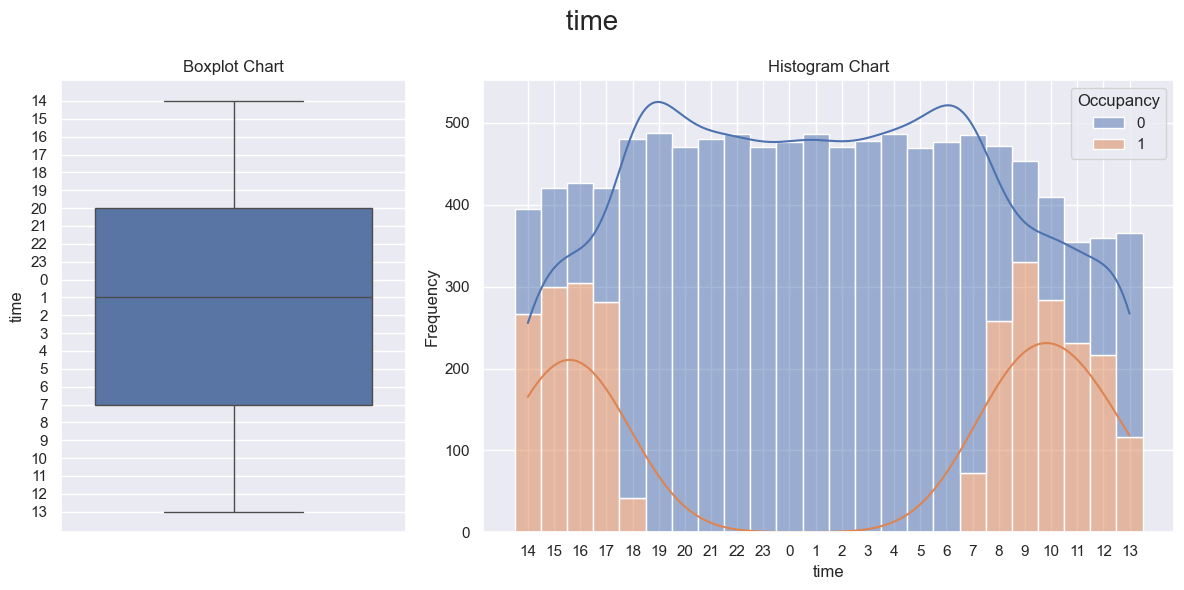

In [24]:
# Distribution of Categorical Features
def plot_continious_distribution(df, column, hue):

    width_ratios = [2, 4]
    gridspec_kw = {'width_ratios':width_ratios}
    fig, ax = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw = gridspec_kw) 
    fig.suptitle(f' {column} ', fontsize=20) 
    
    sns.boxplot(df[column], ax=ax[0])
    ax[0].set_title('Boxplot Chart')
    ax[0].set_ylabel(column)

    sns.histplot(x = df[column], kde=True, ax=ax[1], hue=df[hue], multiple = 'stack', bins=55)
    ax[1].set_title('Histogram Chart')
    ax[1].set_ylabel('Frequency')
    ax[1].set_xlabel(column)

    plt.tight_layout()    
    plt.show()
for conti in continuous :
    plot_continious_distribution(df, conti, 'Occupancy')    

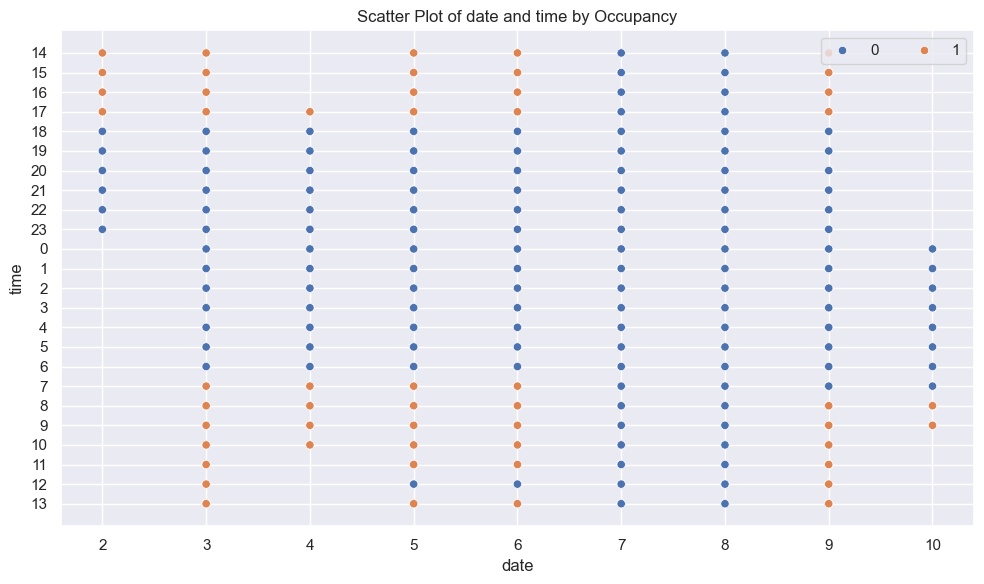

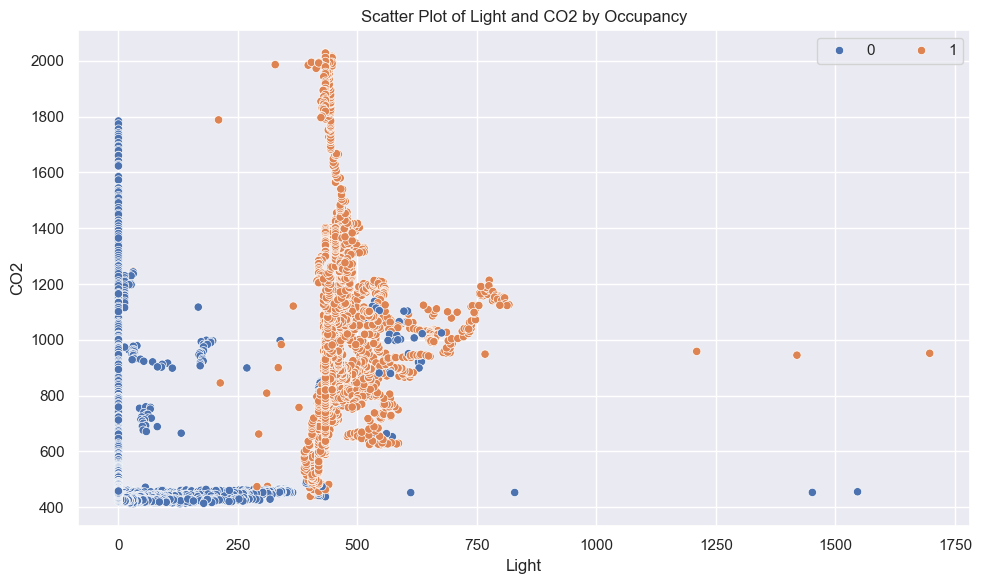

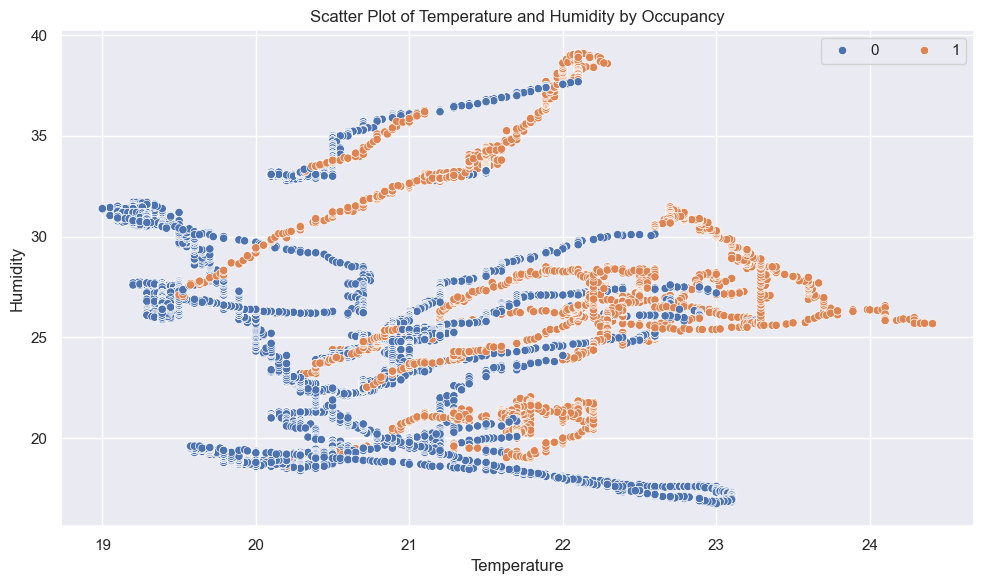

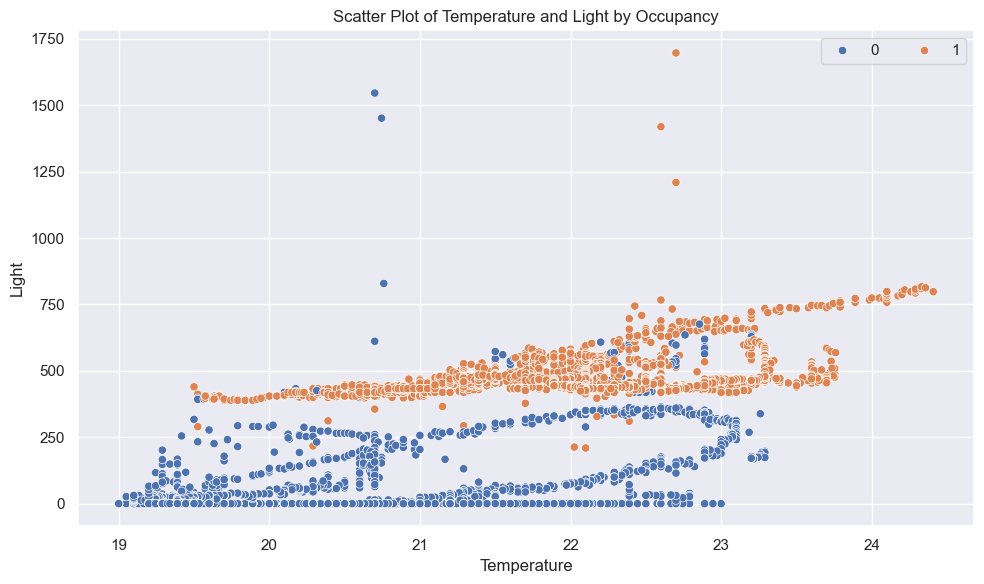

In [25]:
# Define a Function for Scatter Plot
def scatter_plot(data, x, y, hue):
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=data, x=x, y=y, hue=hue)
    plt.title(f'Scatter Plot of {x} and {y} by {hue}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend(title=None, ncol=2, loc='upper right')

    plt.tight_layout()
    plt.show()

scatter_plot(data=df, x="date", y="time", hue="Occupancy")
scatter_plot(data=df, x="Light", y="CO2", hue="Occupancy")
scatter_plot(data=df, x="Temperature", y="Humidity", hue="Occupancy")
scatter_plot(data=df, x="Temperature", y="Light", hue="Occupancy")

## Data Preprocessing

In [26]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
stc = StandardScaler()

stc_cols = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']

# Apply Standard Scaler to the selected columns
df[stc_cols] = stc.fit_transform(df[stc_cols])

## Training and Evaluating Different Models

In [27]:
from sklearn.model_selection import train_test_split 

x = df.drop(['Occupancy'], axis=1)
y = df['Occupancy']  # Target Variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [75]:
#Importing the Libraries
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [76]:
# List of Models to Try
models = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
]

# Train and evaluate each model
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training accuracy: {name}', model.score(x_train, y_train))
    print(f'Test accuracy: {name}', accuracy_score(y_test, y_pred))
    print()


Training accuracy: Decision Tree 1.0
Test accuracy: Decision Tree 0.9911914696337506

Training accuracy: Random Forest 1.0
Test accuracy: Random Forest 0.9925822902178952

Training accuracy: Gradient Boosting 0.9939703153988868
Test accuracy: Gradient Boosting 0.9888734353268428

Training accuracy: K-Nearest Neighbors 0.9943181818181818
Test accuracy: K-Nearest Neighbors 0.990727862772369



In [55]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
print(f'Training accuracy: Random Forest', rf.score(x_train, y_train))
print(f'Test accuracy: Random Forest', accuracy_score(y_test, rf_pred))

Training accuracy: K-Nearest Neighbors 1.0
Test accuracy: K-Nearest Neighbors 0.9925822902178952


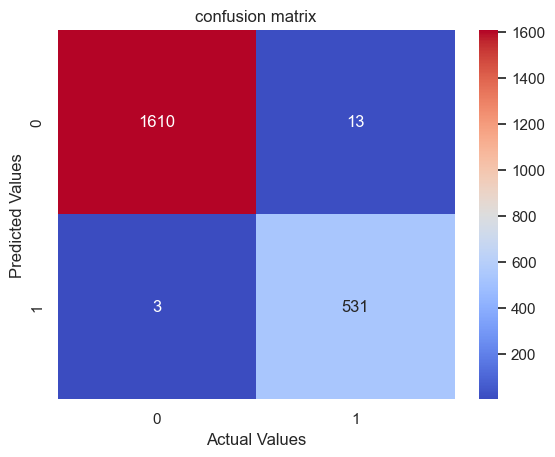

In [56]:
# Visualize confusion matrix for Random Forest Classifier
from sklearn.metrics import confusion_matrix, classification_report
sns.heatmap(confusion_matrix(y_test,rf_pred),annot= True, cmap = 'coolwarm', fmt='.0f')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('confusion matrix')
plt.show()

In [57]:
# Visualize Classification report for Random Forest Classifier
from sklearn.metrics import classification_report
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1623
           1       0.98      0.99      0.99       534

    accuracy                           0.99      2157
   macro avg       0.99      0.99      0.99      2157
weighted avg       0.99      0.99      0.99      2157



### Summary and Conclusion

In this project, I focused on predicting room occupancy using various data preprocessing techniques and a machine learning model. The steps and methodologies employed are as follows:

1. Data Cleaning and Feature Engineering:
   - Timestamp Splitting: The original column containing year, month, day, hour, and minute was split into two separate columns: one for day and another for hour.
   - Data Simplification: The day column was adjusted to store only the day value, and the hour column to store only the hour value.

2. Data Visualization:
   - Appropriate visualizations were created to explore and understand the data patterns and relationships. These visualizations provided significant insights into the data.

3. Data Standardization:
   - Data standardization was performed to normalize the features, ensuring consistency and enhancing model performance.

4. Model Training and Evaluation:
   - A Random Forest model was trained on the processed dataset, achieving a remarkably high accuracy of 99%.

These steps ensured a comprehensive analysis and model training process, leading to a highly accurate prediction model for room occupancy detection.
### *Developed by Hosein Mohammadi*
GitHub : https://github.com/Hosein541

Kaggle : https://www.kaggle.com/hoseinnnnnnn 

Gmail : Huseinmohammadi83@gmail.com